In [4]:
conda install fastbook


Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c pytorch pytorch


Note: you may need to restart the kernel to use updated packages.


In [6]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.4208, 0.4977, 0.7926],
        [0.9324, 0.8682, 0.8642],
        [0.4253, 0.4991, 0.5272],
        [0.6015, 0.0365, 0.9481],
        [0.7111, 0.1229, 0.0701]])


In [7]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Z:\AI_Stuff\Anaconda\lib\site-packages\fastbook\__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [8]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [9]:
path = untar_data(URLs.MNIST_SAMPLE)

In [10]:
doc(path)


In [11]:
Path.BASE_PATH = path

In [12]:
path.ls()


(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [13]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [14]:
threes = (path/'train'/'3').ls().sorted()
threes


(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [15]:
sevens = (path/'train'/'7').ls().sorted()

In [16]:
im3_path=threes[1]
im3 = Image.open(im3_path)
im3

In [17]:
len(threes)

6131

In [18]:
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors)

6131

In [19]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(seven_tensors)

6265

In [70]:
stacked_threes= torch.stack(three_tensors).float()/255
len(stacked_threes.shape)

3

In [21]:
stacked_threes.ndim

3

<AxesSubplot:>

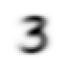

In [26]:
mean3=stacked_threes.mean(0)
show_image(mean3)

In [69]:
stacked_sevens=torch.stack(seven_tensors).float()/255
(stacked_sevens).shape

torch.Size([6265, 28, 28])

<AxesSubplot:>

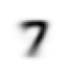

In [32]:
mean7=stacked_sevens.mean(0)
show_image(mean7)

<AxesSubplot:>

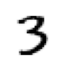

In [34]:
a3 = stacked_threes[1]
show_image(a3)

In [36]:
dist_abs=(a3-mean3).abs().mean()
dist_abs.item()

0.11143654584884644

In [37]:
dist_rms=((a3-mean3)**2).mean().sqrt()
dist_rms.item()

0.20208320021629333

In [38]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [40]:
F.l1_loss(a3.float(),mean7), F.mse_loss(a3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [41]:
def mnist_distance(a,b): return (a-b).abs().mean()
mnist_distance(a_3, mean3)


tensor(0.1114)

In [48]:
trial3s=mnist_distance(stacked_threes,mean3)
trial3s

tensor(0.1313)

In [52]:
valid_3s=torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3s.shape

torch.Size([1010, 28, 28])

In [54]:
trial2=mnist_distance(valid_3s,mean3)
trial2

tensor(36.5054)

In [57]:
def is_3(x): return mnist_distance(x,mean3)< mnist_distance(x,mean7)

In [58]:
is_3(a3)

tensor(True)

In [67]:
(valid_3s-mean3).shape

torch.Size([1010, 28, 28])

In [62]:
is_3(valid_3s)

tensor(True)

In [4]:
def multiply(a,b): a*b

In [3]:
multiply(3,7)